# **Importing Necessary Libraries**

---



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading the Dataset**

---



In [ ]:
df = pd.read_csv("ks_train.csv")
df.head()

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB


In [ ]:
df.shape

(414, 8)

In [ ]:
df.describe()

,id,gravity,ph,osmo,cond,urea,calc,target
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,206.500000,1.017894,5.955459,651.545894,21.437923,278.657005,4.114638,0.444444
std,119.655756,0.006675,0.642260,234.676567,7.514750,136.442249,3.217641,0.497505
min,0.000000,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,103.250000,1.012000,5.530000,455.250000,15.500000,170.000000,1.450000,0.000000
50%,206.500000,1.018000,5.740000,679.500000,22.200000,277.000000,3.130000,0.000000
75%,309.750000,1.022000,6.280000,840.000000,27.600000,385.000000,6.630000,1.000000
max,413.000000,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


# **Checking for NULL Values**

---



In [ ]:
df.isnull().sum()

id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

# **Data Visualisation**

---



<Axes: xlabel='gravity', ylabel='cond'>

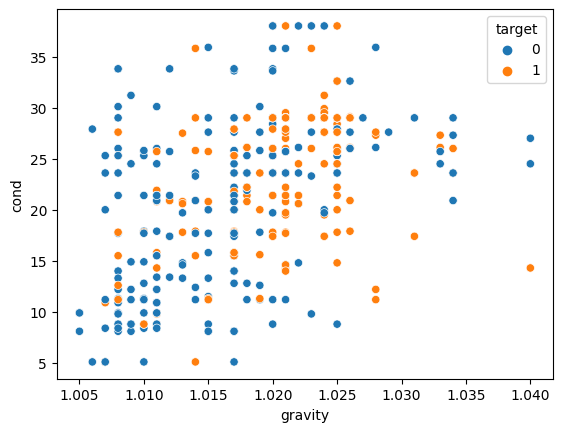

In [ ]:
sns.scatterplot(x="gravity", y="cond", data=df, hue="target")

<Axes: xlabel='target', ylabel='count'>

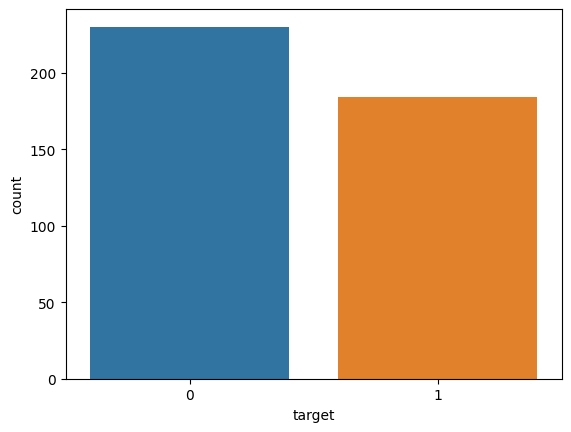

In [ ]:
sns.countplot(x="target", data=df)

<Axes: xlabel='gravity', ylabel='count'>

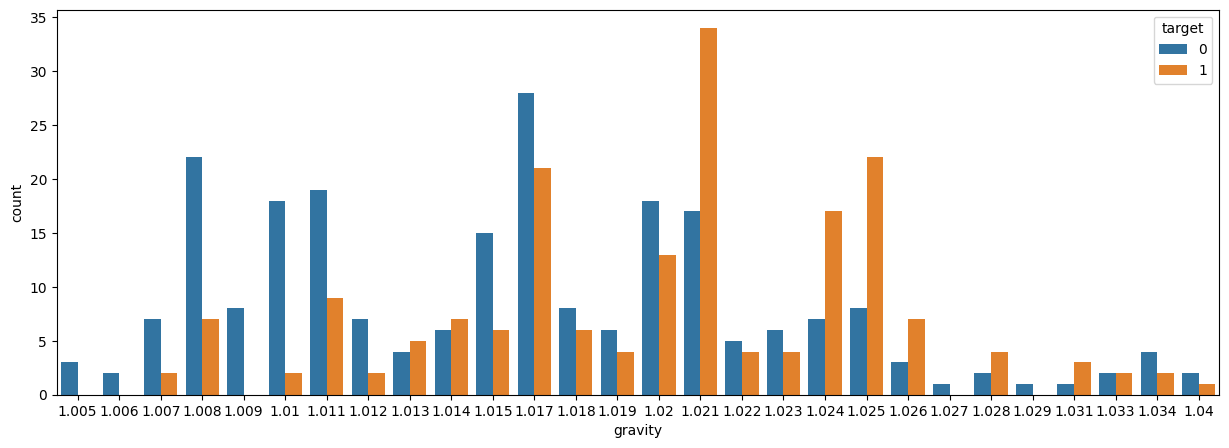

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x="gravity", data=df, hue="target")

<Axes: >

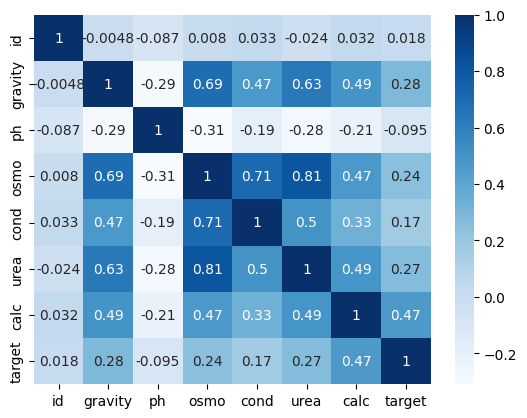

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap="Blues")

# **Seperating Dependent & Independent Variables**

---



In [ ]:
X = df.drop(["id", "target"], axis=1)
y = df["target"]

In [ ]:
X.head()

,gravity,ph,osmo,cond,urea,calc
0,1.013,6.19,443,14.8,124,1.45
1,1.025,5.40,703,23.6,394,4.18
2,1.009,6.13,371,24.5,159,9.04
3,1.021,4.91,442,20.8,398,6.63
4,1.021,5.53,874,17.8,385,2.21


In [ ]:
y.head()

0    0
1    0
2    0
3    1
4    1
Name: target, dtype: int64

# **Splitting into Training & Testing Set**

---



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(331, 6)
(83, 6)
(331,)
(83,)


# **Model Building - XGB Classifier**

---



In [55]:
from xgboost import XGBClassifier
xgbc_model = XGBClassifier()

In [56]:
from sklearn.model_selection import RandomizedSearchCV

In [57]:
xgbc_params = {'gamma' :[i/10.0 for i in range(0,5)],
               'max_depth' : [2,4,6,8,10,12,13,15],
               'min_child_weight':[1,2,5,10],
               'max_delta_step':[0,1,2,5,10],
               'subsample' :[i/10.0 for i in range(5,10)],
               'colsample_bytree' :[i/10.0 for i in range(5,10)],
               'colsample_bylevel' :[i/10.0 for i in range(5,10)],
               'n_estimators' : [100,150,200,300]
               }

In [58]:
xgbc_cv = RandomizedSearchCV(estimator=xgbc_model,
                            param_distributions=xgbc_params,
                            cv=10)

In [59]:
xgbc_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'colsample_bylevel': [0.5, 0.6, 0.7,
                                                              0.8, 0.9],
                                        'colsample_bytree': [0.5, 0.6, 0.7, 0.8,
                                                             0.9],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'max_delta_step': [0, 1, 2, 5, 10],
                                        'max_depth': [2, 4, 6, 8, 10, 12, 13,
                                                      15],
                                        'min_child_weight': [1, 2, 5, 10],
                                        'n_estimators': [100, 150, 200, 300],
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9]})

In [60]:
xgbc_cv.best_params_

{'subsample': 0.5,
 'n_estimators': 150,
 'min_child_weight': 5,
 'max_depth': 12,
 'max_delta_step': 2,
 'gamma': 0.1,
 'colsample_bytree': 0.8,
 'colsample_bylevel': 0.8}

In [61]:
xgbc_model = XGBClassifier( subsample = 0.5,
                           n_estimators = 150,
                            min_child_weight = 5,
                            max_depth = 12,
                            max_delta_step = 2,
                            gamma = 0.1,
                            colsample_bytree = 0.8,
                            colsample_bylevel = 0.8
)

In [62]:
xgbc_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.8, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=2,
              max_depth=12, max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [64]:
xgbc_model.score(X_test, y_test)

0.6746987951807228

# **Model Building - Random Forest Classifier**

---



In [83]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()

In [84]:
from sklearn.model_selection import RandomizedSearchCV

In [85]:
rfc_params = {'max_depth': list(range(10, 15)),
               'max_features': list(range(2,14))}

In [86]:
rfc_cv = RandomizedSearchCV(estimator=rfc_model,
                            param_distributions=rfc_params,
                            cv=10)

In [88]:
rfc_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [10, 11, 12, 13, 14],
                                        'max_features': [2, 3, 4, 5, 6, 7, 8, 9,
                                                         10, 11, 12, 13]})

In [89]:
rfc_cv.best_params_

{'max_features': 4, 'max_depth': 10}

In [90]:
rfc_model = RandomForestClassifier(
    max_features=4, max_depth=10
)

In [91]:
rfc_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=4)

In [92]:
rfc_model.score(X_test, y_test)

0.7108433734939759

# **Testing Data**

---



In [ ]:
test_df = pd.read_csv("ks_test.csv")
test_df.head()

,id,gravity,ph,osmo,cond,urea,calc
0,414,1.017,5.24,345,11.5,152,1.16
1,415,1.020,5.68,874,29.0,385,3.46
2,416,1.024,5.36,698,19.5,354,13.00
3,417,1.020,5.33,668,25.3,252,3.46
4,418,1.011,5.87,567,29.0,457,2.36


In [ ]:
test_df.isnull().sum()

id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
dtype: int64

In [ ]:
X_subs = test_df.drop("id", axis=1)

## **XGBC Predictions**

---



In [79]:
y_subs1 = xgbc_model.predict_proba(X_subs)[:,1]

In [80]:
subs1_df = pd.DataFrame({
    "id":test_df["id"],
    "target":y_subs1
})

In [81]:
subs1_df.head()

,id,target
0,414,0.026783
1,415,0.260273
2,416,0.805533
3,417,0.652783
4,418,0.096421


In [82]:
subs1_df.to_csv("submission1.csv", index=False)

# **RFC Predictions**

---



In [100]:
y_subs2 = rfc_model.predict_proba(X_subs)[:,1]

In [101]:
subs2_df = pd.DataFrame({
    "id":test_df["id"],
    "target":y_subs2
})

In [102]:
subs2_df.head()

,id,target
0,414,0.090000
1,415,0.465703
2,416,0.914632
3,417,0.475723
4,418,0.384765


In [103]:
subs2_df.to_csv("submission2.csv", index=False)